### Explore TPXO9 output files

Let's see what's inside this files.

In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [6]:
datadir = '/Users/Karina/Research/Canyons/internalWaves/data/tides/' 
g_set = xr.load_dataset(datadir + 'gridtpxo9v5a.nc')
u_set = xr.load_dataset(datadir + 'u_tpxo9.v5a.nc')
h_set = xr.load_dataset(datadir + 'h_tpxo9.v5a.nc')

### Grid

In [146]:
#g_set

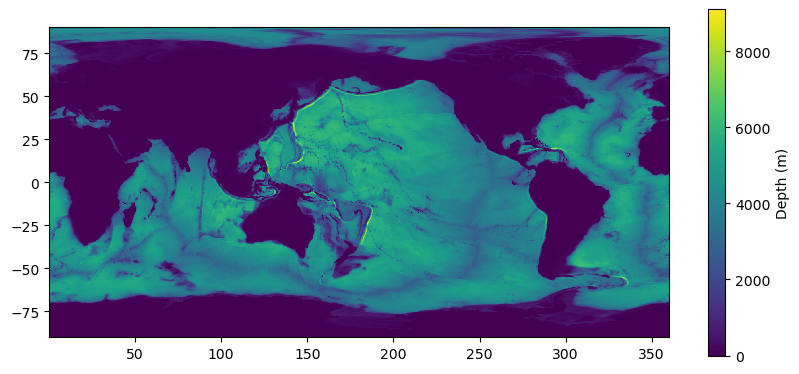

In [30]:
fig, ax = plt.subplots(1,1,figsize=(10,4.5))
pc = ax.pcolormesh(g_set.lon_z, g_set.lat_z, g_set.hz)
plt.colorbar(pc, label='Depth (m)')
ax.set_aspect(1)

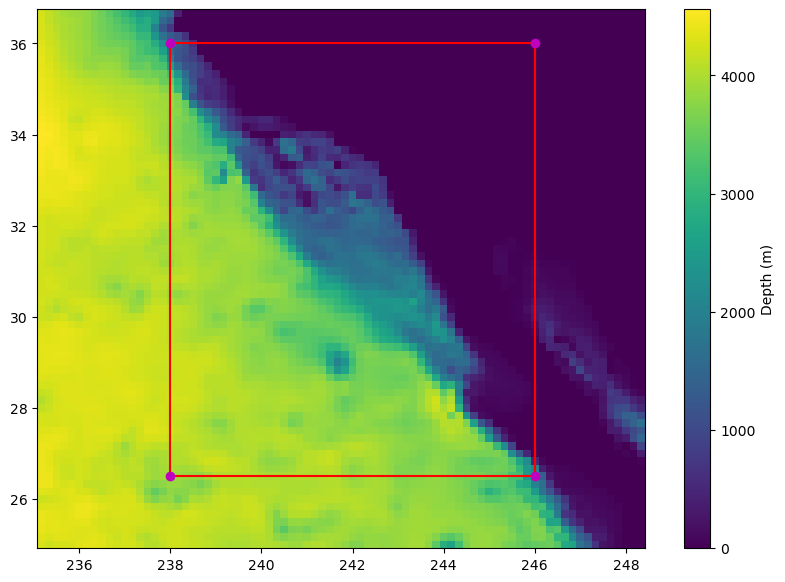

In [92]:
xslice = slice(1410,-670)
yslice = slice(690,-320)

# "father" domain boundaries (get the exact ones from the bin file)
lat1 = 26.5 # N
lat2 = 36   # N
lon1 = 360-122  # W
lon2 = 360-114  # W

fig, ax = plt.subplots(1,1,figsize=(10,7))
pc = ax.pcolormesh(g_set.lon_z.isel(nx=xslice, ny=yslice),
                   g_set.lat_z.isel(nx=xslice, ny=yslice),
                   g_set.hz.isel(nx=xslice, ny=yslice))
plt.colorbar(pc, label='Depth (m)')

# plot father domain's boundaries
ax.plot((lon1,lon1),(lat1,lat2), 'r-')
ax.plot((lon2,lon2),(lat1,lat2), 'r-')
ax.plot((lon1,lon2),(lat1,lat1), 'r-')
ax.plot((lon1,lon2),(lat2,lat2), 'r-')

# Indices of father domain
ny1 = 699 # N
ny2 = 756   # N
nx1 = 1427  # W
nx2 = 1475  # W

# plot father domain's boundaries based on indices
ax.plot(g_set.lon_z[nx1, ny1], g_set.lat_z[nx1, ny1], 'mo')
ax.plot(g_set.lon_z[nx2, ny1], g_set.lat_z[nx2, ny1], 'mo')
ax.plot(g_set.lon_z[nx2, ny2], g_set.lat_z[nx2, ny2], 'mo')
ax.plot(g_set.lon_z[nx1, ny2], g_set.lat_z[nx1, ny2], 'mo')

ax.set_aspect(1)

I can select the tpxo model output at the father's boundaries using xarray's sel function along with it's coordinates and then interpolate into the father's grid. Except lat and lon are not the coordinates so I cannot use sel :-(. Instead I'll find the closest indices I can get.

* Get everything at tracer points (z points in this notation) h, u, v, phase.

* Check how Ponte and Cornuelle add tides to MITgcm.

### Velocities and transports

**Relevant variables** 

|variable| name| units | notes |
|:-:|:-:|:-:|:-:|
|nc| tidal constituents, 22|str| First constituent is M2 (index 0)|
|Ua| Tidal WE transport amplitude at U-nodes| meter^2/s| vector points W->E, dims (nc, nx, ny), |
|ua|  Tidal WE velocity amplitude at U-nodes| cm/s| vector points W -> E|
|up| Tidal WE transport/velocity phase at U-nodes|degree GMT |phase, scalar, dims (nc, nx, ny)|
|URe|Tidal WE transport complex ampl., Real part, at U-nodes|meter^2/s | Re(U), vector W->E|
|UIm|Tidal transport complex ampl., Imag part, at U-nodes|meter^2/s|Im(U), vector W->E|

Analogous variables for S-N components va, Va, vp, VRe, VIm. Vector points S -> N.

nc: 22
nx: 2160
ny: 1081

Period for M2 constituent is 24hrs 50 min = 24.833 hrs = 89399.988 s          

In [ ]:
# u_set

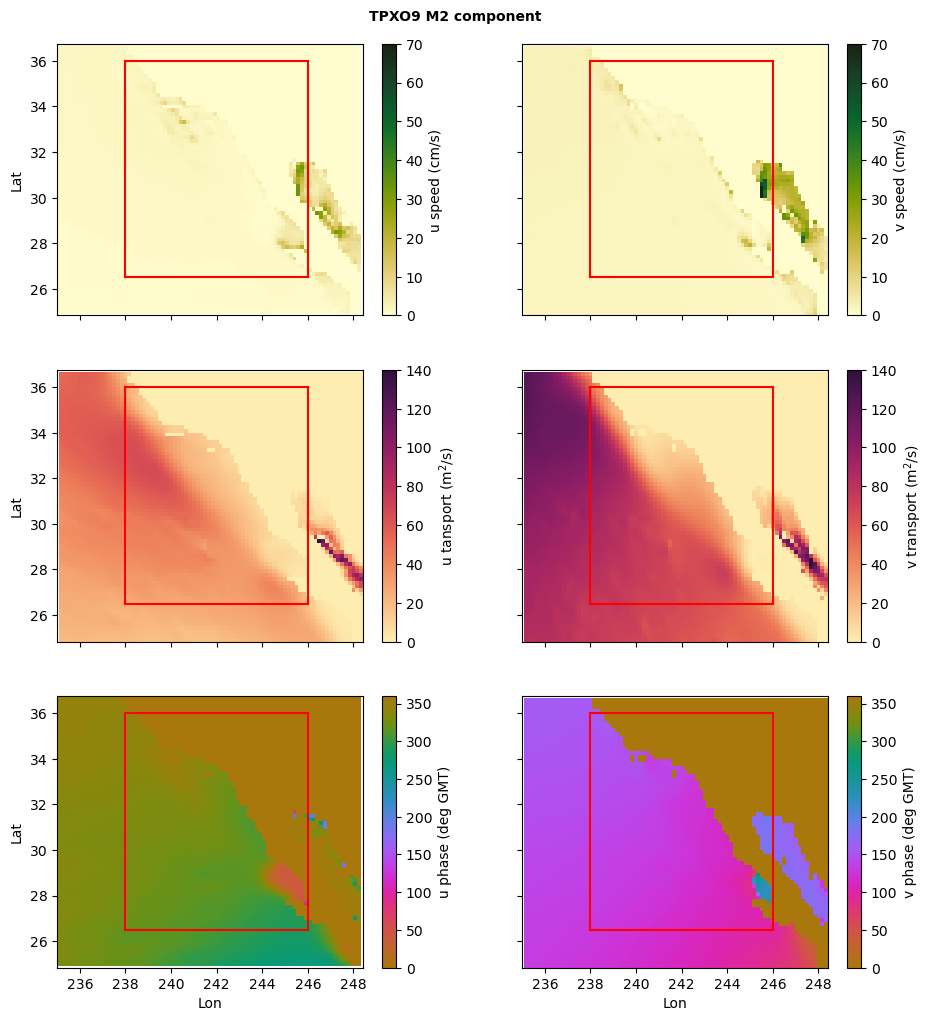

In [131]:
xslice = slice(1410,-670)
yslice = slice(690,-320)
const = 0 # corresponds to M2

# "father" domain boundaries (get the exact ones from the bin file)
lat1 = 26.5 # N
lat2 = 36   # N
lon1 = 360-122  # W
lon2 = 360-114  # W

fig, ((ax1,ax2),(ax3,ax4),(ax5, ax6)) = plt.subplots(3,2,figsize=(11,12),
                                                     sharex=True, sharey=True)
pc1 = ax1.pcolormesh(u_set.lon_u.isel(nx=xslice, ny=yslice),
                    u_set.lat_u.isel(nx=xslice, ny=yslice),
                    u_set.ua.isel(nc=0, nx=xslice, ny=yslice),
                    cmap=cmo.cm.speed,
                    vmin=0, vmax=70)
plt.colorbar(pc1, ax=ax1, label='u speed (cm/s)')

pc2 = ax2.pcolormesh(u_set.lon_v.isel(nx=xslice, ny=yslice),
                    u_set.lat_v.isel(nx=xslice, ny=yslice),
                    u_set.va.isel(nc=0, nx=xslice, ny=yslice),
                    cmap=cmo.cm.speed,
                    vmin=0, vmax=70)
plt.colorbar(pc2, ax=ax2, label='v speed (cm/s)')

pc3 = ax3.pcolormesh(u_set.lon_v.isel(nx=xslice, ny=yslice),
                    u_set.lat_v.isel(nx=xslice, ny=yslice),
                    u_set.Ua.isel(nc=0, nx=xslice, ny=yslice),
                    cmap=cmo.cm.matter,
                    vmin=0, vmax=140)
plt.colorbar(pc3, ax=ax3, label='u tansport (m$^2$/s)')

pc4 = ax4.pcolormesh(u_set.lon_v.isel(nx=xslice, ny=yslice),
                    u_set.lat_v.isel(nx=xslice, ny=yslice),
                    u_set.Va.isel(nc=0, nx=xslice, ny=yslice),
                    cmap=cmo.cm.matter,
                    vmin=0, vmax=140)
plt.colorbar(pc4, ax=ax4, label='v transport (m$^2$/s)')

pc5 = ax5.pcolormesh(u_set.lon_u.isel(nx=xslice, ny=yslice),
                    u_set.lat_u.isel(nx=xslice, ny=yslice),
                    u_set.up.isel(nc=0, nx=xslice, ny=yslice),
                    cmap=cmo.cm.phase,
                    vmin=0, vmax=360)
plt.colorbar(pc5, ax=ax5, label='u phase (deg GMT)')

pc6 = ax6.pcolormesh(u_set.lon_v.isel(nx=xslice, ny=yslice),
                    u_set.lat_v.isel(nx=xslice, ny=yslice),
                    u_set.vp.isel(nc=0, nx=xslice, ny=yslice),
                    cmap=cmo.cm.phase,
                    vmin=0, vmax=360)
plt.colorbar(pc6, ax=ax6, label='v phase (deg GMT)')

# plot father domain's boundaries
for ax in (ax1,ax2,ax3,ax4,ax5,ax6):
    ax.plot((lon1,lon1),(lat1,lat2), 'r-')
    ax.plot((lon2,lon2),(lat1,lat2), 'r-')
    ax.plot((lon1,lon2),(lat1,lat1), 'r-')
    ax.plot((lon1,lon2),(lat2,lat2), 'r-')
    ax.set_aspect(1)

for ax in (ax1,ax3,ax5):
    ax.set_ylabel('Lat')
for ax in (ax,ax6):   
    ax.set_xlabel('Lon')
ax1.text(1.3, 1.1, 'TPXO9 M2 component', horizontalalignment='center',
         verticalalignment='center', transform=ax1.transAxes, fontweight='bold')

plt.show()

M2 phase speeds, transports, and phases.

### Height amplitude

In [130]:
h_set

<xarray.Dataset>
Dimensions:  (nc: 22, nx: 2160, ny: 1081)
Dimensions without coordinates: nc, nx, ny
Data variables:
    con      (nc) |S4 b'm2  ' b's2  ' b'n2  ' ... b'mu2 ' b'nu2 ' b'oo1 '
    lon_z    (nx, ny) float64 0.1667 0.1667 0.1667 0.1667 ... 360.0 360.0 360.0
    lat_z    (nx, ny) float64 -90.0 -89.83 -89.67 -89.5 ... 89.67 89.83 90.0
    ha       (nc, nx, ny) float64 0.0 0.0 0.0 ... 0.0002285 0.0001605 2.078e-08
    hp       (nc, nx, ny) float64 0.0 0.0 0.0 0.0 ... 342.0 341.9 342.0 312.4
    hRe      (nc, nx, ny) float64 0.0 0.0 0.0 ... 0.0002172 0.0001527 1.401e-08
    hIm      (nc, nx, ny) float64 0.0 0.0 0.0 ... 7.093e-05 4.961e-05 1.535e-08
Attributes:
    type:     OTIS tidal elevation file
    title:    TPXO9.v5a 2021 tidal elevation file: open ocean - TPXO9.v2, coa...

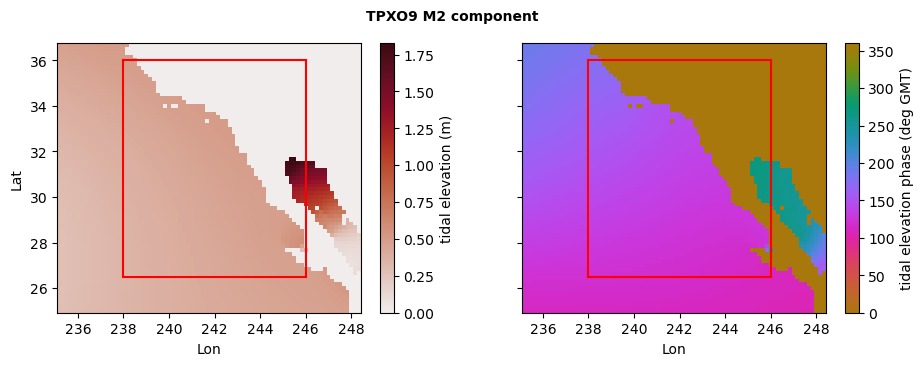

In [145]:
xslice = slice(1410,-670)
yslice = slice(690,-320)
const = 0 # corresponds to M2

# "father" domain boundaries (get the exact ones from the bin file)
lat1 = 26.5 # N
lat2 = 36   # N
lon1 = 360-122  # W
lon2 = 360-114  # W

fig, ((ax1,ax2)) = plt.subplots(1, 2,figsize=(11,3.5),
                                          sharex=True, sharey=True)
pc1 = ax1.pcolormesh(h_set.lon_z.isel(nx=xslice, ny=yslice),
                    h_set.lat_z.isel(nx=xslice, ny=yslice),
                    h_set.ha.isel(nc=0, nx=xslice, ny=yslice),
                    cmap=cmo.cm.amp,
                    )
plt.colorbar(pc1, ax=ax1, label='tidal elevation (m)')

pc2 = ax2.pcolormesh(h_set.lon_z.isel(nx=xslice, ny=yslice),
                    h_set.lat_z.isel(nx=xslice, ny=yslice),
                    h_set.hp.isel(nc=0, nx=xslice, ny=yslice),
                    cmap=cmo.cm.phase,
                    vmin=0, vmax=360)
plt.colorbar(pc2, ax=ax2, label='tidal elevation phase (deg GMT)')

# plot father domain's boundaries
for ax in (ax1,ax2):
    ax.plot((lon1,lon1),(lat1,lat2), 'r-')
    ax.plot((lon2,lon2),(lat1,lat2), 'r-')
    ax.plot((lon1,lon2),(lat1,lat1), 'r-')
    ax.plot((lon1,lon2),(lat2,lat2), 'r-')
    ax.set_aspect(1)

ax1.set_ylabel('Lat')
for ax in (ax1,ax2):   
    ax.set_xlabel('Lon')
ax1.text(1.3, 1.1, 'TPXO9 M2 component', horizontalalignment='center',
         verticalalignment='center', transform=ax1.transAxes, fontweight='bold')

plt.show()

### What does MITgcm expect as a boundary condition?